<a href="https://colab.research.google.com/github/KarlYang2013/tf_study/blob/master/tf_keras_classification_model_normalize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
#%开头这样确保可以在notebook中使用matplotlib
%matplotlib inline
import numpy as np 
import pandas as pd
import sklearn
import os 
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)
#查看有哪些数据集 目前有7个
help(keras.datasets)
fashion_minist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_minist.load_data()
#训练集再拆成校验集合和训练集合
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]
print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

2.2.0
sys.version_info(major=3, minor=6, micro=9, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.18.5
pandas 1.0.5
sklearn 0.22.2.post1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf
Help on package tensorflow.keras.datasets in tensorflow.keras:

NAME
    tensorflow.keras.datasets - Public API for tf.keras.datasets namespace.

PACKAGE CONTENTS
    boston_housing (package)
    cifar10 (package)
    cifar100 (package)
    fashion_mnist (package)
    imdb (package)
    mnist (package)
    reuters (package)

FILE
    /usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/__init__.py


(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [ ]:
print(np.max(x_train), np.min(x_train))

255 0


In [ ]:
#标准化处理 x = (x - u) / std
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#创建对象
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1,1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

In [ ]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [ ]:
#tf.keras.Sequential()使用
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))#Flatten把数据展平方便输入神经网络
model.add(keras.layers.Dense(512, activation = 'relu'))
model.add(keras.layers.Dense(258, activation = 'relu'))
model.add(keras.layers.Dense(128, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))
#损失函数和优化器设置
model.compile(loss="sparse_categorical_crossentropy",
              #optimizer = keras.optimizers.Adagrad(0.001),
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [ ]:
model.layers

In [ ]:
#查看layer的shape 参数的总数等
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 258)               132354    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               33152     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 568,716
Trainable params: 568,716
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#训练模型 可以通过参数validation_split划分比例直接将训练集和中的部分样本作为验证集
#也可以通过参数validation_data传入验证集
history = model.fit(x = x_train_scaled,y = y_train, validation_data = (x_valid_scaled, y_valid),epochs = 10)

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.9248 - accuracy: 0.7043 - val_loss: 0.5931 - val_accuracy: 0.8044
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5579 - accuracy: 0.8095 - val_loss: 0.4969 - val_accuracy: 0.8334
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4896 - accuracy: 0.8304 - val_loss: 0.4589 - val_accuracy: 0.8394
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4542 - accuracy: 0.8405 - val_loss: 0.4354 - val_accuracy: 0.8432
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4305 - accuracy: 0.8476 - val_loss: 0.4191 - val_accuracy: 0.8482
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4127 - accuracy: 0.8549 - val_loss: 0.4052 - val_accuracy: 0.8542
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3984 - accuracy: 0.8592 - val_loss: 0.3994 - val_accuracy:

In [ ]:
print(type(history))
print(history.history)

<class 'tensorflow.python.keras.callbacks.History'>
{'loss': [0.9248028993606567, 0.5579479336738586, 0.48956090211868286, 0.4541681706905365, 0.4304836392402649, 0.4127381145954132, 0.39841654896736145, 0.38673487305641174, 0.3768904507160187, 0.36829718947410583], 'accuracy': [0.7042909264564514, 0.8095272779464722, 0.8303636312484741, 0.8404726982116699, 0.847599983215332, 0.8548727035522461, 0.8592363595962524, 0.8630545735359192, 0.8661454319953918, 0.8692363500595093], 'val_loss': [0.593071460723877, 0.4969026744365692, 0.4589228928089142, 0.4354150891304016, 0.4191248416900635, 0.4051544964313507, 0.3993586301803589, 0.39041951298713684, 0.38139840960502625, 0.37888863682746887], 'val_accuracy': [0.8044000267982483, 0.8334000110626221, 0.8393999934196472, 0.8432000279426575, 0.8482000231742859, 0.854200005531311, 0.8597999811172485, 0.8601999878883362, 0.86080002784729, 0.8658000230789185]}


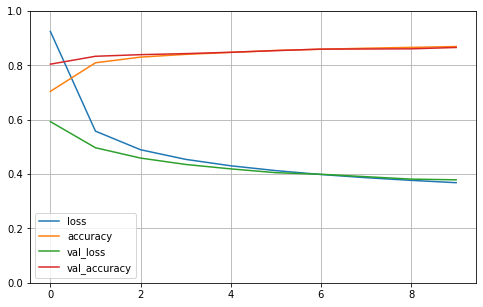

In [ ]:
#可视化学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [ ]:
#评估
model.evaluate(x_test_scaled, y_test, verbose = 1)

313/313 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8519


[0.4088936746120453, 0.8518999814987183]